# Problem:
## Help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Converting 'Select' values to NaN because it is same as user did not select anything
df = df.replace('Select', np.nan)

In [4]:
#checking the stats column wise
print(df.shape)
print(df.info())
print(df.describe())

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

### Null values treatment

In [5]:
#null values percentage
print((df.isnull().sum()/len(df.index)) *100.0)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [6]:
#since Lead Profile and How did you hear about X Education have high null values, it is better to drop them
df.drop(['How did you hear about X Education','Lead Profile'],axis=1,inplace =True)

In [7]:
#have to look if only one value is present
print(df.nunique())
#Let's check the columns having values in each column only 1
print(df.loc[:,list(df.nunique()==1)].columns)

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [8]:
#We can see that 5 columns have only 1 value and they are not null anywhere
#this will not be contributed towards model so we can drop them
list_to_remove = list(df.loc[:,list(df.nunique()==1)].columns)
df.drop(list_to_remove,axis=1,inplace =True)

In [9]:
print((df.isnull().sum()/len(df.index)) *100.0)
df.shape

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

(9240, 30)

In [10]:
#Now we should be checking the value counts of Asymmetrique* attributes
print(df['Asymmetrique Activity Index'].value_counts())
print(df['Asymmetrique Profile Index'].value_counts())
print(df['Asymmetrique Profile Score'].value_counts())
print(df['Asymmetrique Activity Score'].value_counts())

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


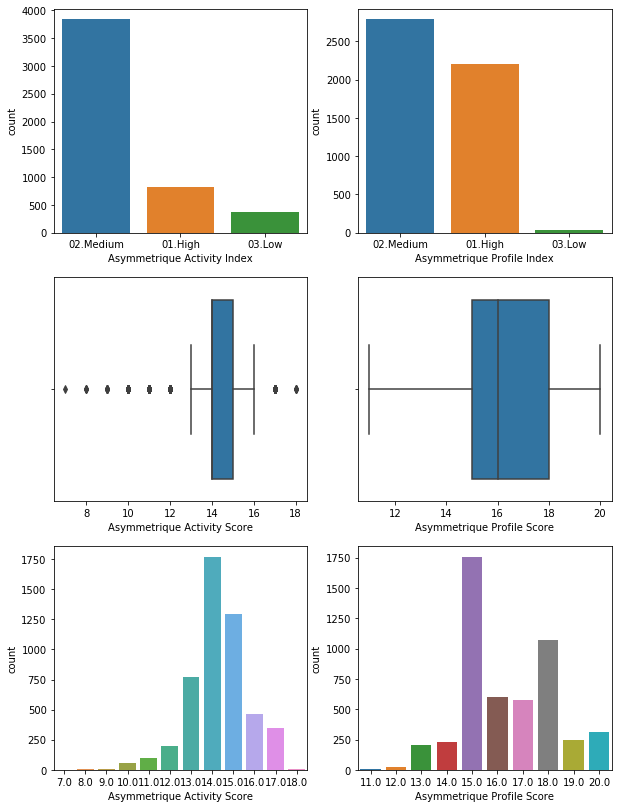

In [11]:
#Let's see the distribution of these  *
f, axes = plt.subplots(3, 2, figsize=(10, 14))
sns.countplot(x='Asymmetrique Activity Index',data=df,ax=axes[0,0])
sns.countplot(data=df,x='Asymmetrique Profile Index',ax=axes[0,1])
sns.boxplot(df['Asymmetrique Activity Score'],ax=axes[1,0])
sns.boxplot(data=df,x='Asymmetrique Profile Score',ax=axes[1,1])
sns.countplot(df['Asymmetrique Activity Score'],ax=axes[2,0])
sns.countplot(data=df,x='Asymmetrique Profile Score',ax=axes[2,1])

In [12]:
#First we see that Index in this is grouping of Score , for eg. Activity Index Low means score below 13 and so on
# So these are redundant columns
#Moreover 45% data is missing and we dont see any particular pattern 
#Data is also varying too much
#We should drop these columns
list_to_remove = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(list_to_remove,axis=1,inplace =True)

In [13]:
#Let's again see the % nulls
print((df.isnull().sum()/len(df.index)) *100.0)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

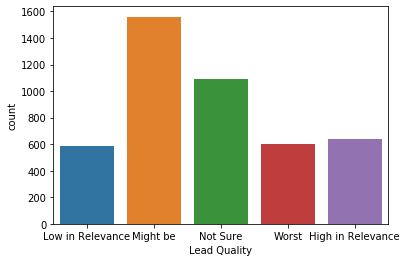

In [14]:
#Let's now analyse Lead Quality
sns.countplot(data=df,x='Lead Quality')

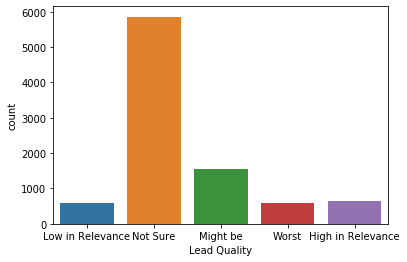

In [15]:
#Lead Quality is based on the data and intuition the the employee who has been assigned to the lead.
#So if no data is filled then we can safely assume Not sure
df['Lead Quality']= df['Lead Quality'].replace(np.nan, 'Not Sure')
sns.countplot(data=df,x='Lead Quality')

57.83521809369952


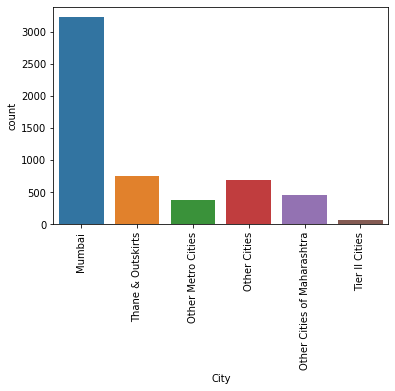

In [16]:
#Looking at City
plt.xticks(rotation=90)
k=len(df[df['City']=='Mumbai'])/len(df[~df['City'].isnull()]) * 100.0
print(k)
sns.countplot(data=df,x='City')

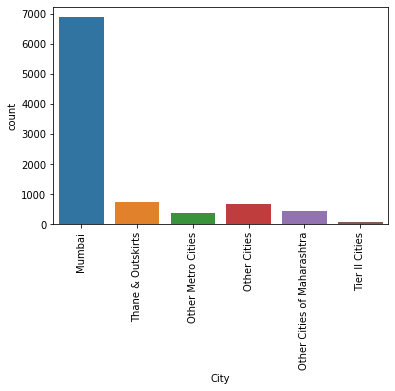

In [17]:
#We see mumbai is highest(~58% of filled values) so we can fill with the Mode
df['City']= df['City'].replace(np.nan, 'Mumbai')
plt.xticks(rotation=90)
sns.countplot(data=df,x='City')

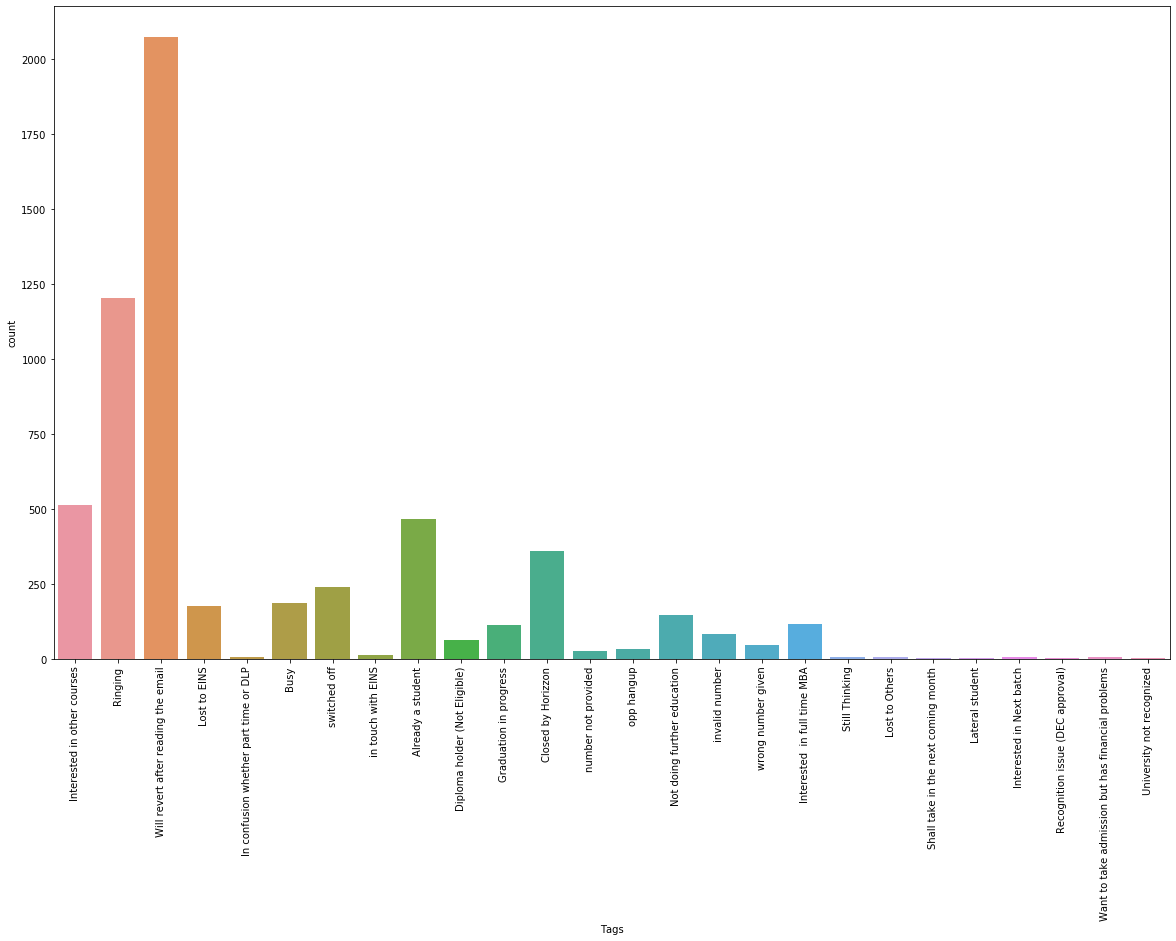

In [18]:
#Let's look at Tags
plt.figure(figsize=(20, 12))
plt.xticks(rotation=90)
sns.countplot(x='Tags',data=df)

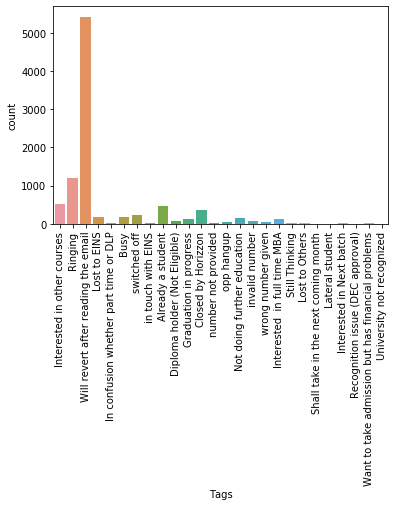

In [19]:
#We may think that we should not impute values but the Select implies the person has not chosen it. It may safely be assumed that 
#s/he will reply in future or after reading the mail
df['Tags']= df['Tags'].replace(np.nan, 'Will revert after reading the email')
plt.xticks(rotation=90)
sns.countplot(data=df,x='Tags')

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


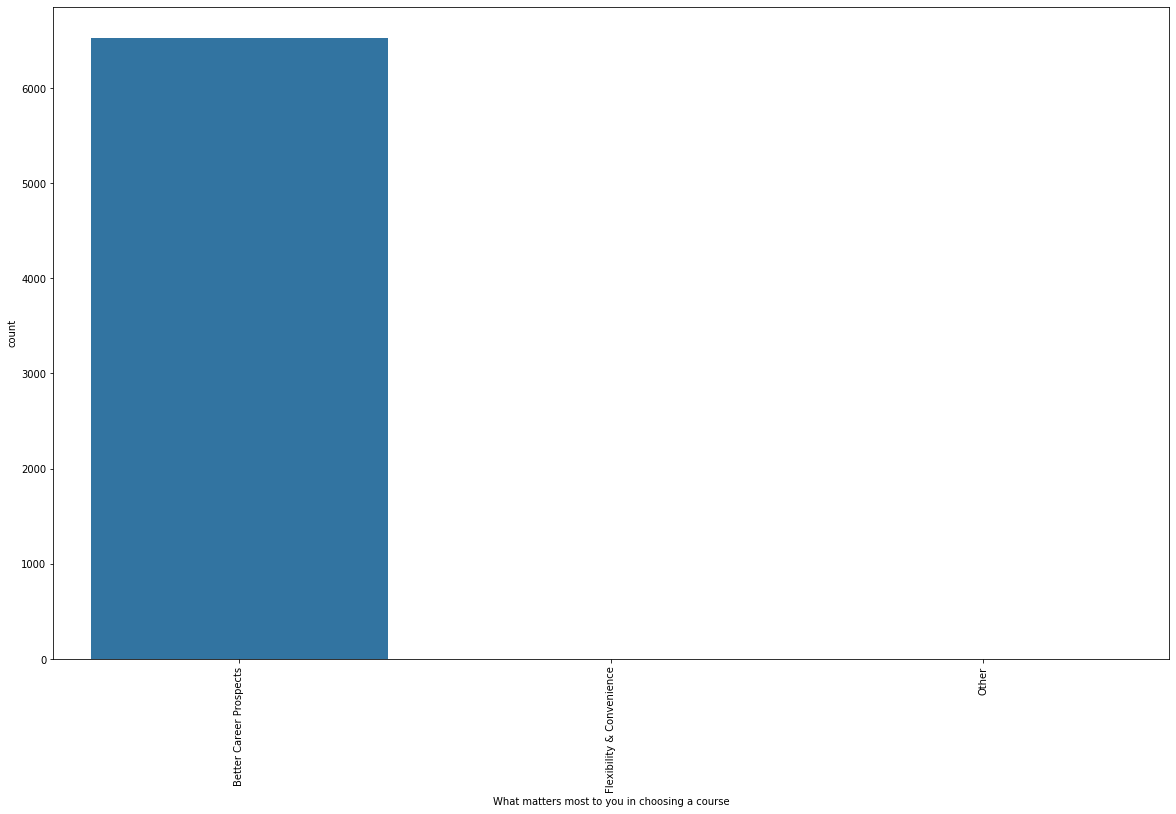

In [20]:
#Let's look at What matters most to you in choosing a course
plt.figure(figsize=(20, 12))
plt.xticks(rotation=90)
print(df['What matters most to you in choosing a course'].value_counts())
sns.countplot(x='What matters most to you in choosing a course',data=df)

In [21]:
#Only 3 values are different than Better Career Prospects, thus this is also like single value present and also 30% of data 
#is missing, it's better to leave this column
df.drop(['What matters most to you in choosing a course'],axis=1,inplace =True)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


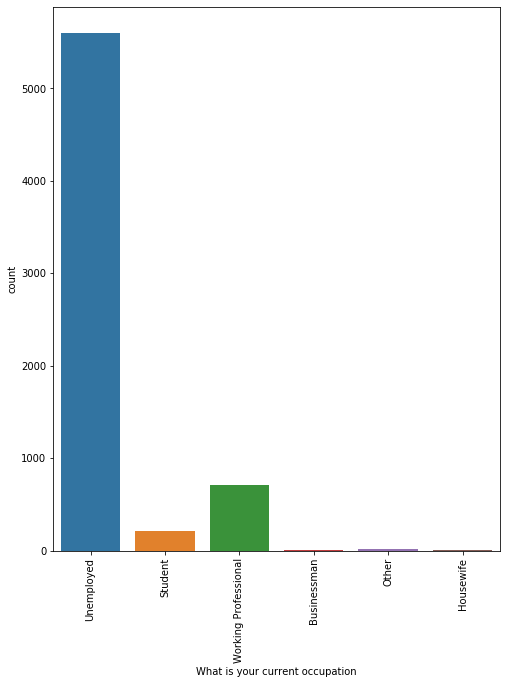

In [22]:
#Let's look at What is your current occupation
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
print(df['What is your current occupation'].value_counts())
sns.countplot(x='What is your current occupation',data=df)

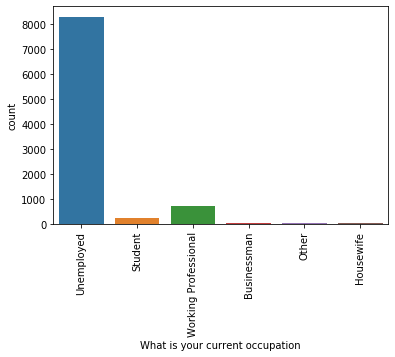

In [23]:
#Here Unemployed seems to be in staggering %, we can assume null values to be Unemployed
df['What is your current occupation']= df['What is your current occupation'].replace(np.nan, 'Unemployed')
plt.xticks(rotation=90)
sns.countplot(data=df,x='What is your current occupation')

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


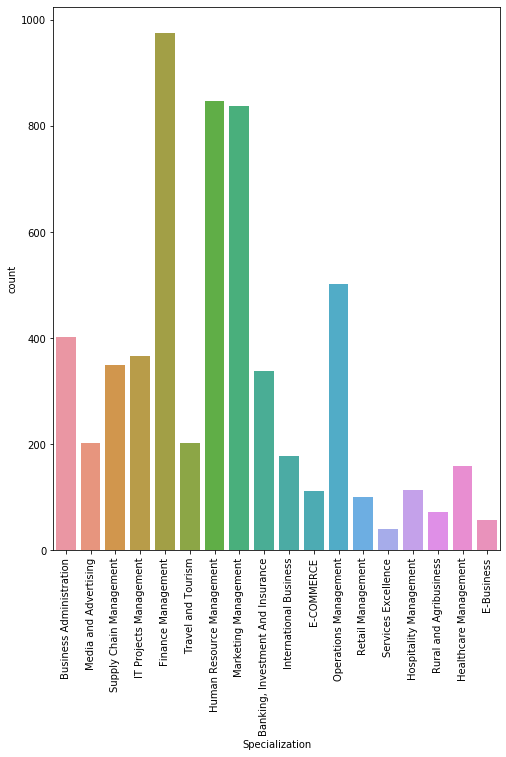

In [24]:
#Looking at Specialization
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
print(df['Specialization'].value_counts())
sns.countplot(x='Specialization',data=df)

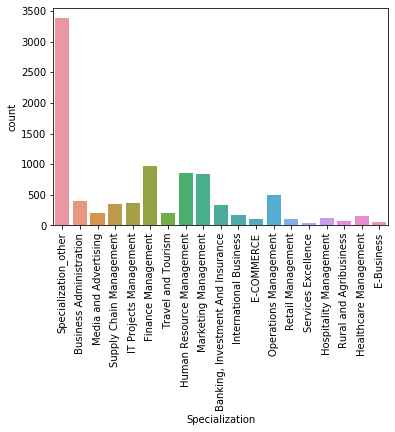

In [25]:
#Null(Select) means the customer had not selected this option while filling the form
#This is due to his specialization not in options
df['Specialization']= df['Specialization'].replace(np.nan, 'Specialization_other')
plt.xticks(rotation=90)
sns.countplot(data=df,x='Specialization')

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
Canada                     4
Germany                    4
South Africa               4
Sweden                     3
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Bangladesh                 2
Netherlands                2
Belgium                    2
Philippines                2
China                      2
Uganda                     2
Vietnam                    1
Denmark                    1
Switzerland                1
Russia                     1
Tanzania                   1
Malaysia                   1
Indonesia     

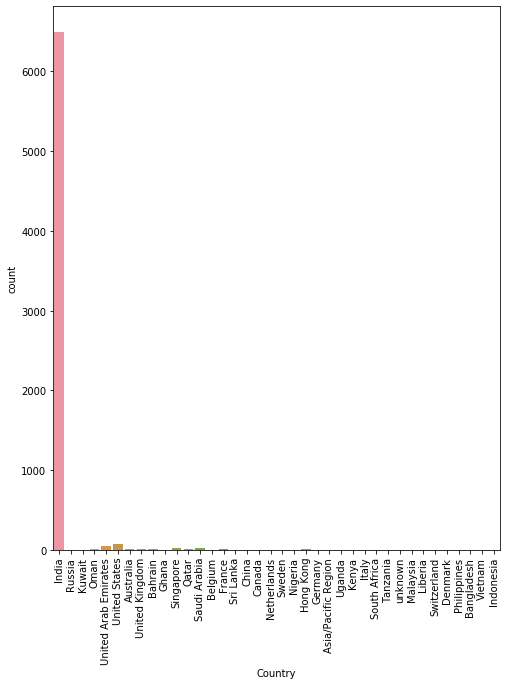

In [26]:
#Looking at Country
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
print(df['Country'].value_counts())
sns.countplot(x='Country',data=df)

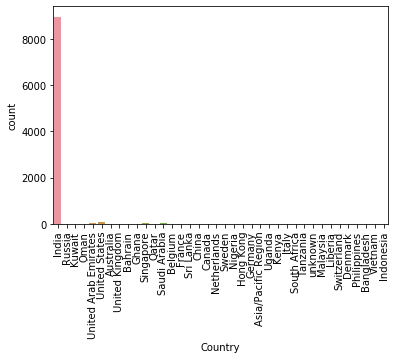

In [27]:
#Filling with India
df['Country']= df['Country'].replace(np.nan, 'India')
plt.xticks(rotation=90)
sns.countplot(data=df,x='Country')

In [28]:
print((df.isnull().sum()/len(df.index)) *100.0)

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations        

In [29]:
#Now only small percentages are left, we can remove these rows
df.dropna(inplace = True)
print((df.isnull().sum()/len(df.index)) *100.0)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
Lead Quality                      

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Do Not Call                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Country                                   9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Search      

## Visualizing data

#### Univariate Analysis

In [31]:
#Previously we have seen that Lead Number and Prospect ID are unique for each row
#We can remove one of them
df.drop('Prospect ID',axis=1,inplace =True)

0    5639
1    3435
Name: Converted, dtype: int64


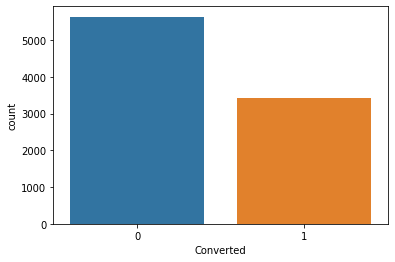

In [32]:
#What is the ratio of Converted data?
print(df['Converted'].value_counts())
sns.countplot(x='Converted',data=df)

In [33]:
#~38% is conversion rate which shows data is not imalanced

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


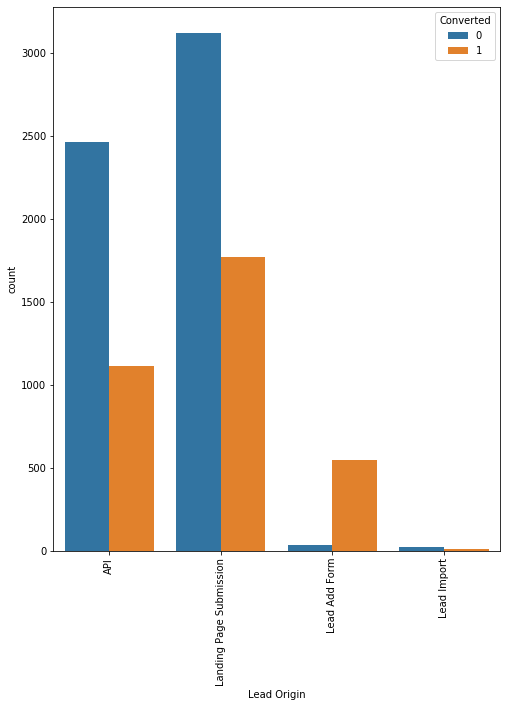

In [34]:
#We will look only that data which we have not filled at the imputation time

#looking at Lead Origin
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
print(df['Lead Origin'].value_counts())
sns.countplot(x='Lead Origin',data=df,hue='Converted')

In [35]:
#Thus we see that highest percentage of Leads origin which got converted was Lead Add Form
#From other sources, the percentage seems 30-35%

#Areas of improvement
#Increase the counts of Lead Add Form

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64


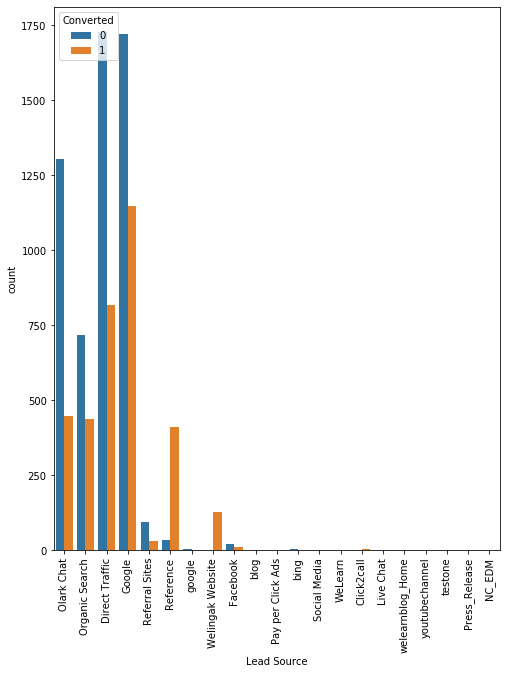

In [36]:
#looking at Lead Source
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
print(df['Lead Source'].value_counts())
sns.countplot(x='Lead Source',data=df,hue='Converted')

In [37]:
#Lets merge google with Google
df['Lead Source']= df['Lead Source'].replace('google', 'Google')
#Also merging all whose counts are less than 10 to Miscellaneous
df['Lead Source']= df['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads',
                                             'blog','testone','NC_EDM','WeLearn','youtubechannel','welearnblog_Home'], 'Miscellaneous')

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Miscellaneous         23
Name: Lead Source, dtype: int64


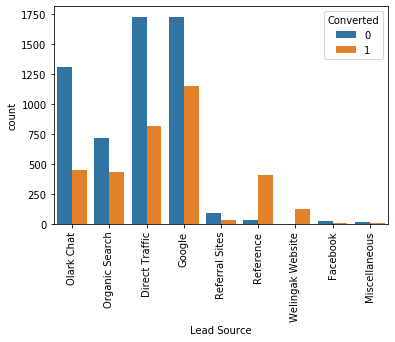

In [38]:
plt.xticks(rotation=90)
print(df['Lead Source'].value_counts())
sns.countplot(x='Lead Source',data=df,hue='Converted')

In [39]:
#Here we can see that reference is playing a big role in conversion rates which is very high.
#Other sources include Google and Direct traffic on site
#Areas of improvement
#Increase the Referals by giving more incentives to referee

No     8358
Yes     716
Name: Do Not Email, dtype: int64


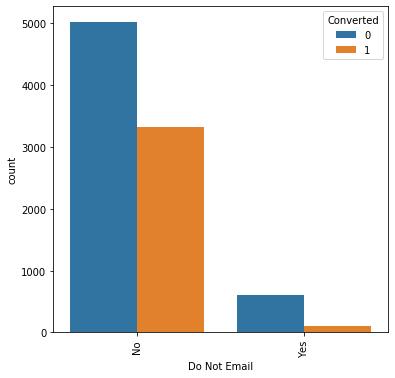

In [40]:
#looking at Do Not Email
plt.figure(figsize=(6, 6))
plt.xticks(rotation=90)
print(df['Do Not Email'].value_counts())
sns.countplot(x='Do Not Email',data=df,hue='Converted')

In [41]:
#Thus people who tell not to email them are less likely to churn than who don't

No     9072
Yes       2
Name: Do Not Call, dtype: int64


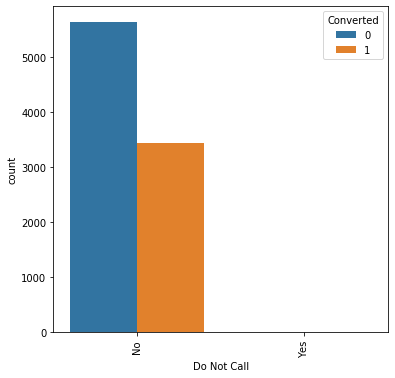

In [42]:
#looking at Do Not Call
plt.figure(figsize=(6, 6))
plt.xticks(rotation=90)
print(df['Do Not Call'].value_counts())
sns.countplot(x='Do Not Call',data=df,hue='Converted')

In [43]:
#Here data is totally invariate and so we can think of dropping ths column
df.drop('Do Not Call',axis=1,inplace =True)

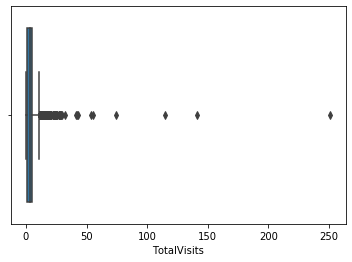

In [44]:
#Analysing TotalVisits
sns.boxplot(df['TotalVisits'])

In [45]:
#Here the outliers are large in numbers
#we can mark the outliers after .95 and before .5 percentile
k=np.percentile(df['TotalVisits'],q=[5,25, 50, 75, 90, 95, 99,100])
print(k)

[  0.   1.   3.   5.   7.  10.  17. 251.]


In [46]:
print(len(df[df['TotalVisits']>=10]))
print(len(df[df['TotalVisits']<=1]))
print(len(df.index))

467
2556
9074


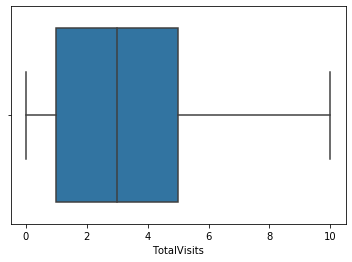

In [47]:
#Let's drop all the rows outside 5% in upper limit that is above 95 percentiles 
#Or we can also cap the values to 95 percentile

dd = df[df['TotalVisits']>=10]['TotalVisits'].index
df.loc[dd,'TotalVisits'] = 10
sns.boxplot(df['TotalVisits'])

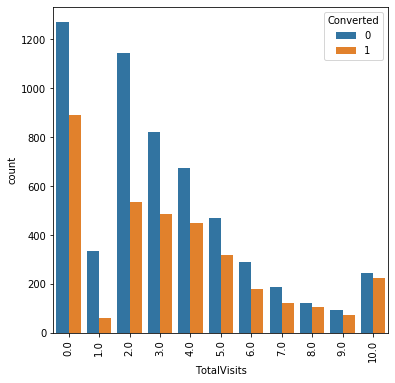

In [48]:
#Seeing target wise
plt.figure(figsize=(6, 6))
plt.xticks(rotation=90)
sns.countplot(x='TotalVisits',data=df,hue='Converted')

In [49]:
#This isn't giving any useful data as people not even visiting website are more converting to potential leads

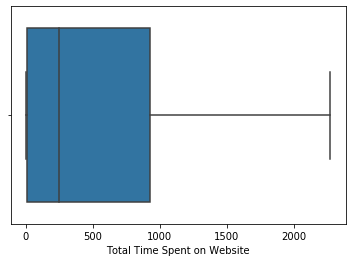

In [50]:
#Analysing Total Time Spent on Website
sns.boxplot(df['Total Time Spent on Website'])

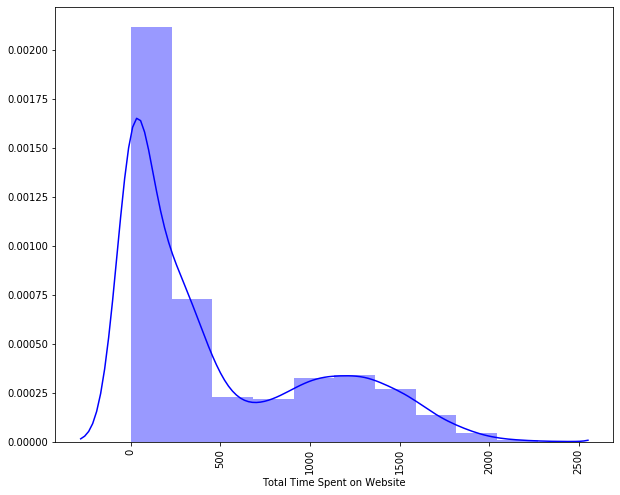

In [51]:
#Seeing distplot
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.distplot(df['Total Time Spent on Website'],color='blue', kde=True,bins=10)

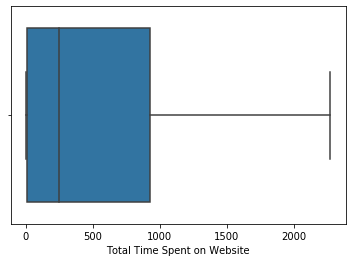

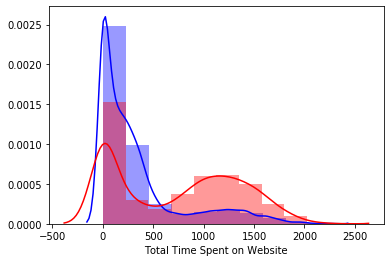

In [52]:
#We can see most of the people didd not spend time on website
#Let's see effect on Converted
sns.boxplot(data=df,x='Total Time Spent on Website',hue='Converted')
plt.show()

sns.distplot(df[df['Converted']==0]['Total Time Spent on Website'],color='blue', kde=True,bins=10)
sns.distplot(df[df['Converted']==1]['Total Time Spent on Website'],color='red', kde=True,bins=10)
plt.show()


In [53]:
#Here we can see Red:converted Blue:Not converted
#Red is more if either the client hasn't seen the website or spent more than 500 mins
#Improvement: make people spend more time

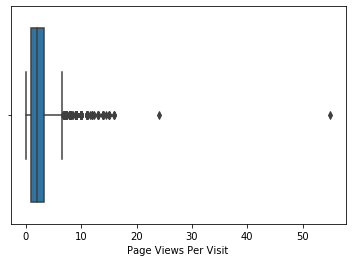

In [54]:
#Analysing Page Views Per Visit
sns.boxplot(df['Page Views Per Visit'])

In [55]:
#Here the outliers are large in numbers
#we can mark the outliers after .95 and before .5 percentile
k=np.percentile(df['Page Views Per Visit'],q=[5,25, 50, 75, 90, 95, 99,100])
print(k)

[ 0.   1.   2.   3.2  5.   6.   9.  55. ]


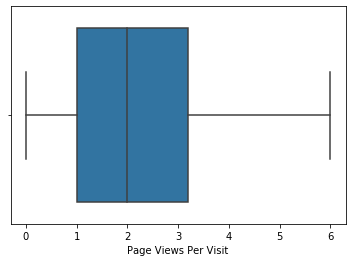

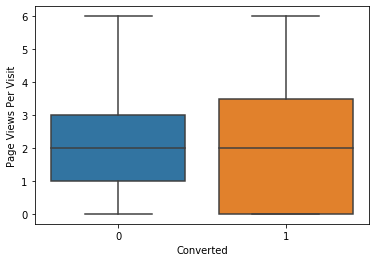

In [56]:
#Let's cap the Page Views to max 95Percentile

dd = df[df['Page Views Per Visit']>=6.]['Page Views Per Visit'].index
df.loc[dd,'Page Views Per Visit'] = 6
sns.boxplot(data=df,x='Page Views Per Visit')
plt.show()
sns.boxplot(data=df,y='Page Views Per Visit',x='Converted')
plt.show()

In [57]:
#Page views are not seeming to affect the Conversion rate

In [58]:
#Looking for Last Activity
print(df['Last Activity'].value_counts())

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


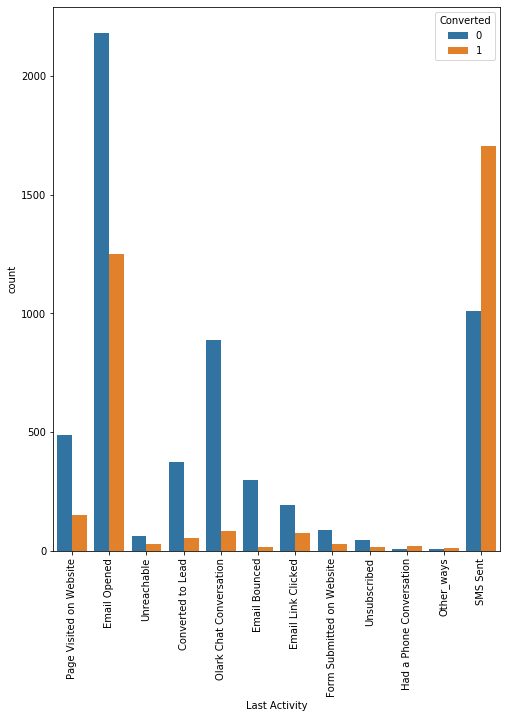

In [59]:
#combining low frequency things to others
plt.figure(figsize=(8, 10))
plt.xticks(rotation=90)
combine = ['View in browser link Clicked','Approached upfront','Email Marked Spam' ,'Email Received','Resubscribed to emails','Visited Booth in Tradeshow']
df['Last Activity']= df['Last Activity'].replace(combine, 'Other_ways')
sns.countplot(x='Last Activity',data=df,hue='Converted')

In [60]:
#We see that sms sent was last activity after which they joined some course
#improvement: Send more sms and email than others

In [61]:
#Country wise
print(len(df[df['Country']=='India'])/len(df.index))

0.968371170376901


In [62]:
#Since most of the data is India we can drop this column
df.drop('Country',axis=1,inplace =True)

In [63]:
#Looking for Specialization
print(df['Specialization'].value_counts())

Specialization_other                 3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


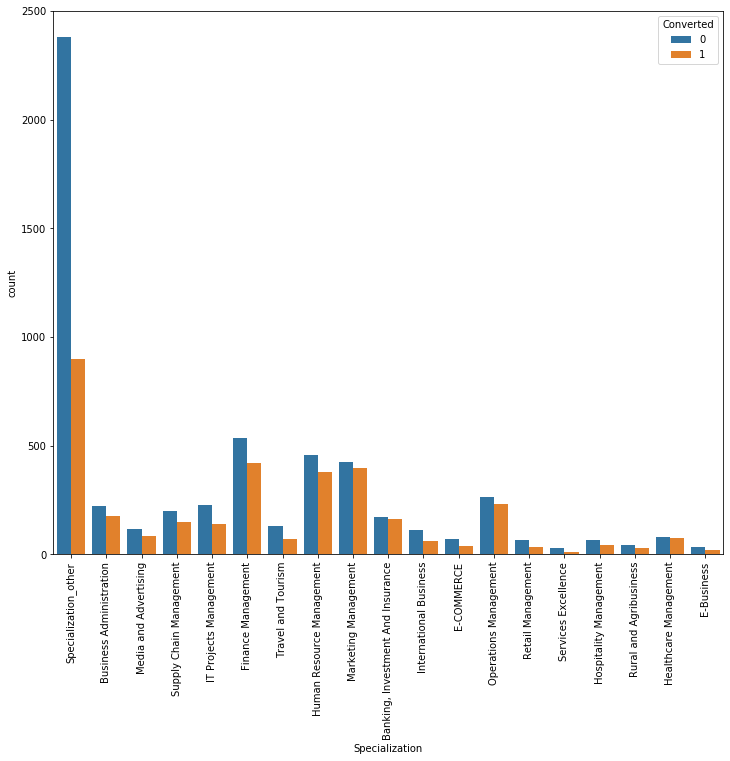

In [64]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='Specialization',data=df,hue='Converted')

In [65]:
#From mentioned specializations, finance and Marketing and HRM are most converted
#Improvement:More focus on these Professions

In [66]:
#Looking for How did you hear about X Education
print(df['What is your current occupation'].value_counts())

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


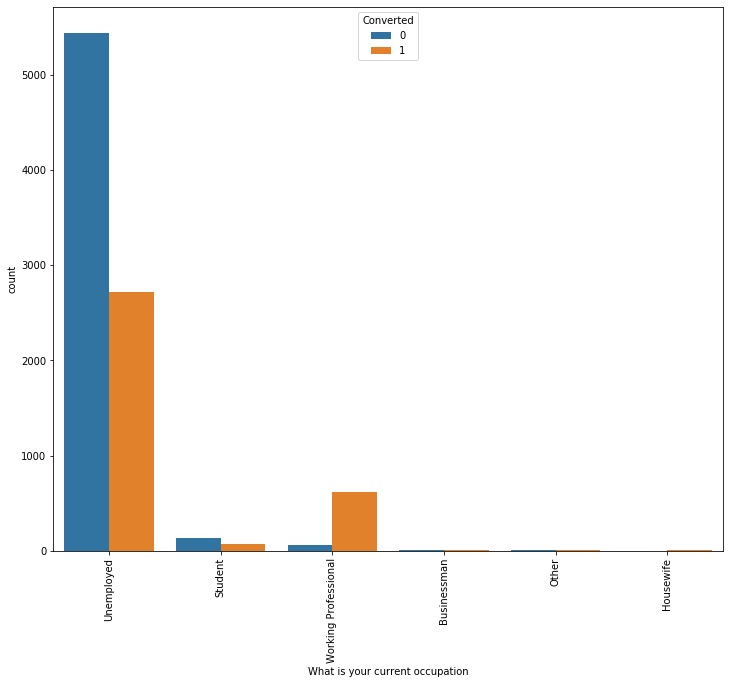

In [67]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='What is your current occupation',data=df,hue='Converted')

In [68]:
#Working Professionsals are more converting but Unemployed are largest in number
#Improvement: More marketing in Unemployed and more advertising in Working professionals

In [69]:
#Looking for Search,Newspaper Article
print(df['Search'].value_counts())
print(df['Newspaper Article'].value_counts())
print(df['X Education Forums'].value_counts())
print(df['Newspaper'].value_counts())
print(df['Digital Advertisement'].value_counts())
print(df['Through Recommendations'].value_counts())

No     9060
Yes      14
Name: Search, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64


In [70]:
#Percentage of Yes is much much less, dropping these columns
df.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace =True)

In [71]:
#Analysing tags
print(df['Tags'].value_counts())

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

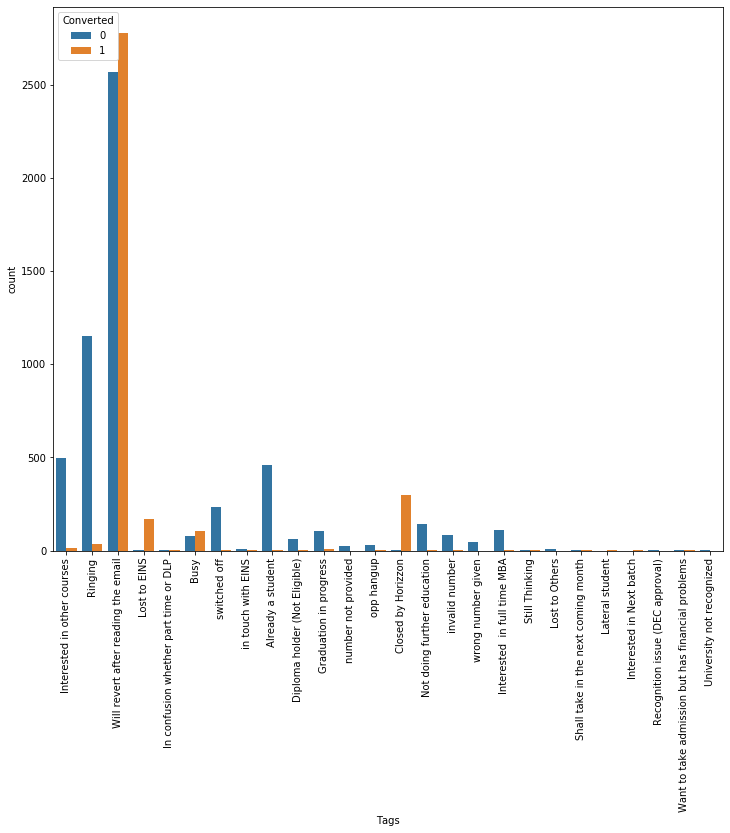

In [72]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='Tags',data=df,hue='Converted')

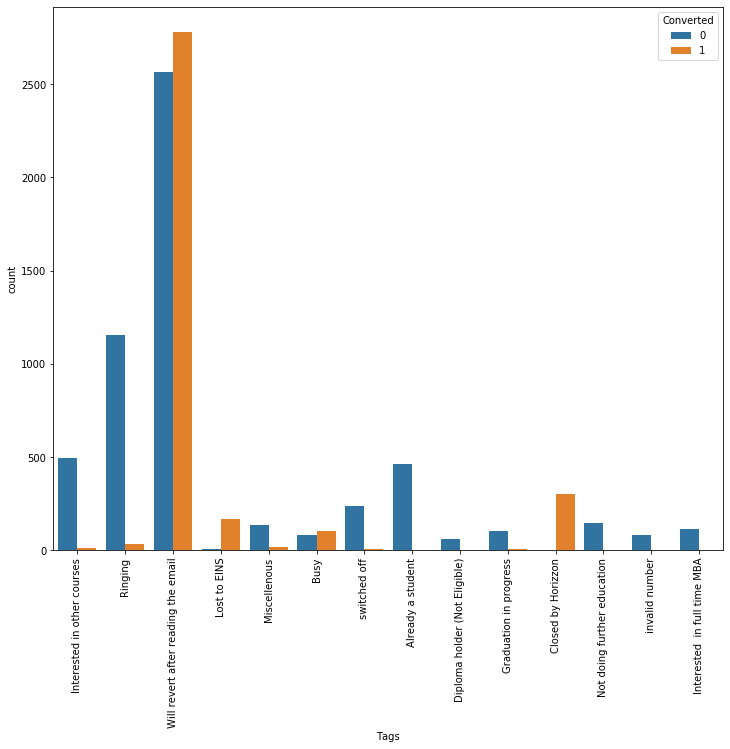

In [73]:
#Replacing less than 50 to a miscellaneous category
l=['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking',
   'Want to take admission but has financial problems','Interested in Next batch','In confusion whether part time or DLP',
   'Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']
df['Tags']= df['Tags'].replace(l, 'Miscellenous')
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='Tags',data=df,hue='Converted')

In [74]:
#Mostly people with reverting after reading mail are converted and by percentage, closed by horizzon is highest.

In [75]:
#Analysing Lead Quality
print(df['Lead Quality'].value_counts())

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64


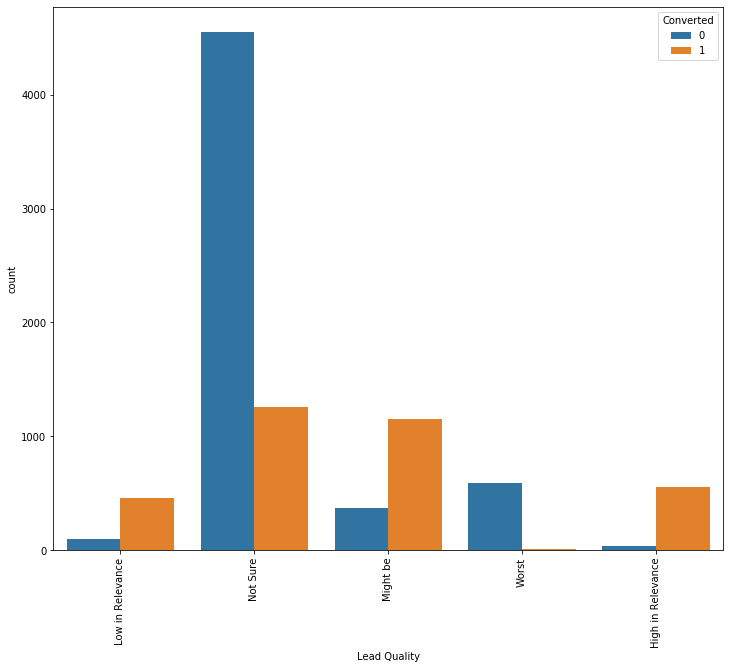

In [76]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='Lead Quality',data=df,hue='Converted')

In [77]:
#More people with Might be are converting and also Low and High relevance are converting

In [78]:
#Analysing City
print(df['City'].value_counts())

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64


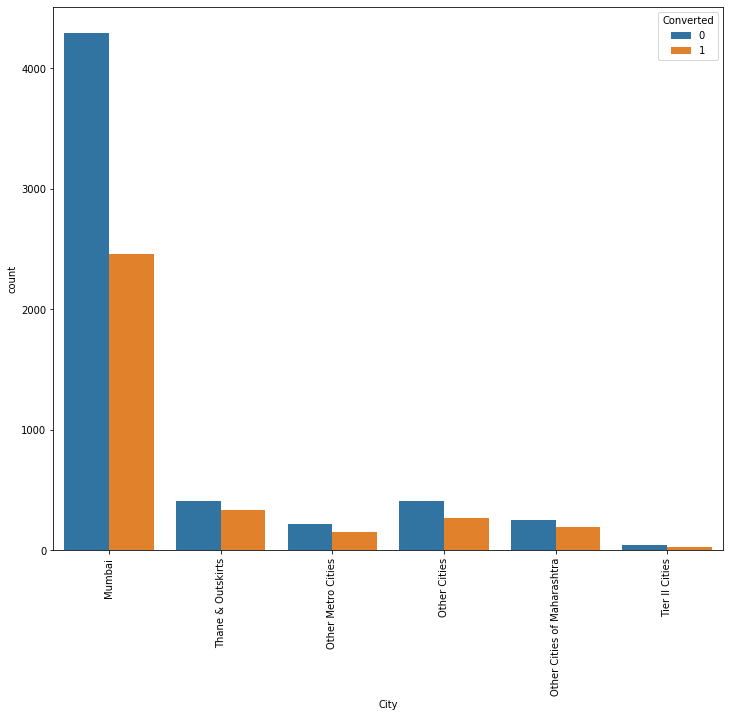

In [79]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='City',data=df,hue='Converted')

In [80]:
#Most of the cities are Mumbai and near thane
#Nothing concrete info just that Mumbai is highest giving conversion

In [81]:
#Analysing A free copy of Mastering The Interview
print(df['A free copy of Mastering The Interview'].value_counts())

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


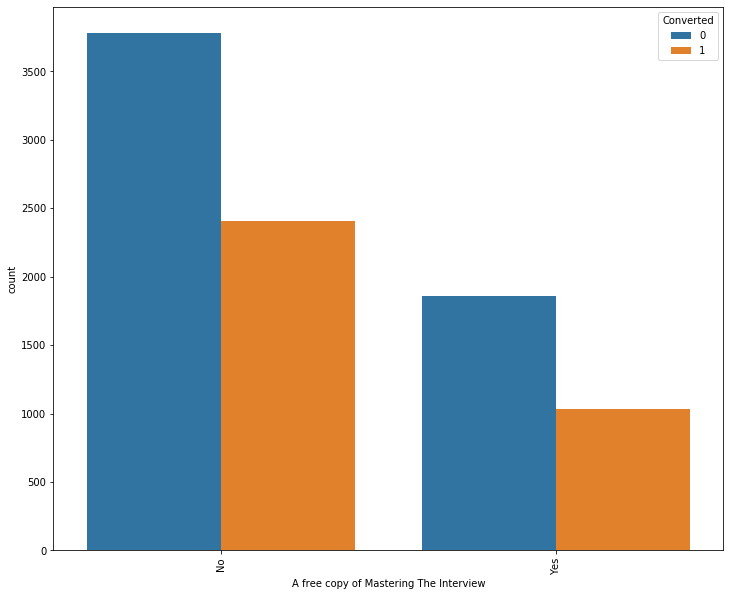

In [82]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='A free copy of Mastering The Interview',data=df,hue='Converted')

In [83]:
#Both distributions look same and so no concrete inference on this basis

In [84]:
#Analysing Last Notable Activity
print(df['Last Notable Activity'].value_counts())

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


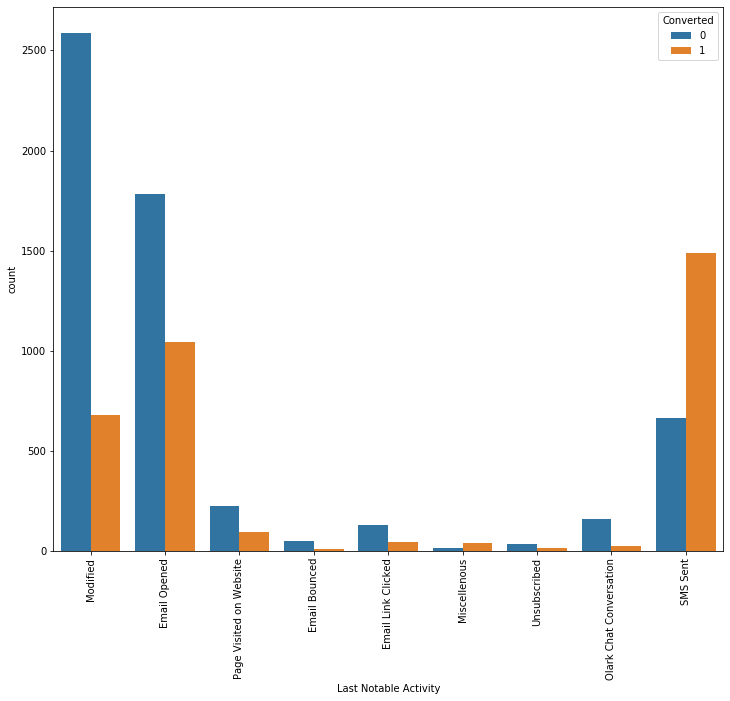

In [85]:
#Replacing less than 45 to a miscellaneous category
l=['Unreachable','Had a Phone Conversation','Email Marked Spam','Email Received','Approached upfront',
   'View in browser link Clicked','Resubscribed to emails','Form Submitted on Website']
df['Last Notable Activity']= df['Last Notable Activity'].replace(l, 'Miscellenous')
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.countplot(x='Last Notable Activity',data=df,hue='Converted')

In [86]:
#Again we see sms sent has highest conversion rate.

In [87]:
df.info()
#No null colimns present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
Lead Quality                              9074 non-null object
City                                      9074 non-null object
A free copy 

## Data Preparation

In [88]:
#have to check if only one value is present
print(df.nunique())

Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Last Activity                               12
Specialization                              19
What is your current occupation              6
Tags                                        14
Lead Quality                                 5
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                        9
dtype: int64


In [89]:
#marking the binary, cat and num variables
num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','City',
       'Last Notable Activity']
binary = ['Do Not Email','A free copy of Mastering The Interview']

In [90]:
#changing binary variables to 1,0 instead of yes,no
    
df[binary]=df[binary].replace('Yes', int(1))
df[binary]=df[binary].replace('No', int(0))
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Specialization_other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Specialization_other,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Specialization_other,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


In [91]:
#Making Dummy variables for categorical varuables
dum = pd.get_dummies(df[cat], drop_first=True)
dum.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_ways,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellenous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Miscellenous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
#creating a copy of original df
df_backup = df.copy(deep=True)
df_backup.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Specialization_other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Specialization_other,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Specialization_other,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


In [93]:
#Concatenating the data
df = pd.concat([df, dum], axis=1)
df.shape

(9074, 91)

In [94]:
#removing the categorical values
df.drop(cat,axis=1,inplace=True)
df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_ways,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellenous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Miscellenous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Splitting the data

In [95]:
from sklearn.model_selection import train_test_split

X = df.drop(['Lead Number','Converted'],axis=1)
y = df['Converted']
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# Splitting the data into train and test
df_train, df_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [96]:
y_test.head()

3271    0
1490    1
7936    0
4216    1
3830    0
Name: Converted, dtype: int64

## Scaling the data

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:
df_train[num] = scaler.fit_transform(df_train[num])

## Model Building

In [99]:
import statsmodels.api as sm

In [100]:
#building the initial model
logreg0 = sm.GLM(y_train,(sm.add_constant(df_train)), family = sm.families.Binomial())
logreg0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.9
Date:                Sun, 17 Nov 2019   Deviance:                       2505.8
Time:                        18:59:15   Pearson chi2:                 4.04e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.9783      2.022      1.473      0.141      -0.985       6.942
Do Not Email                                            -1.3698      0.327     -4.192      0.000      -2.010      -0.729
TotalVisits                                              0.1950      0.087      2.242      0.025       0.025       0.365
Total Time Spent on Website                              1.1422      0.064     17.924      0.000       1.017       1.267
Page Views Per Visit                                    -0.3379      0.099     -3.411      0.001      -0.532      -0.144
A free copy of Mastering The Interview                  -0.2529      0.177     -1.431      0.152      -0.599       0.093
Lead Origin_Landing Page Submission                     -0.9817      0.222     -4.431      0.000      -1.416      -0.547
Lead Origin_Lead Add Form                               -0.3519      1.296     -0.271      0.786      -2.892       2.189
Lead Origin_Lead Import                                 28.5740   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -27.7083   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.0918      0.183      0.502      0.616      -0.267       0.451
Lead Source_Miscellaneous                                0.6148      0.827      0.743      0.457      -1.007       2.237
Lead Source_Olark Chat                                   0.7859      0.245      3.209      0.001       0.306       1.266
Lead Source_Organic Search                               0.2016      0.213      0.946      0.344      -0.216       0.619
Lead Source_Reference                                    1.6423      1.357      1.210      0.226      -1.017       4.302
Lead Source_Referral Sites                              -0.1491      0.494     -0.302      0.763      -1.118       0.820
Lead Source_Welingak Website                             5.3237      1.496      3.558      0.000       2.391       8.256
Last Activity_Email Bounced                             -0.5827      0.874     -0.667      0.505      -2.295       1.130
Last Activity_Email Link Clicked                         0.8468      0.644      1.315      0.189      -0.416       2.109
Last Activity_Email Opened                               0.0084      0.384      0.022      0.983      -0.745       0.762
Last Activity_Form Submitted on Website                  0.0750      0.588      0.128      0.899      -1.078       1.228
Last Activity_Had a Phone Conversation                   1.1846      1.514      0.783      0.434      -1.782       4.151
Last Activity_Olark Chat Conversation                   -0

In [101]:
#there are many values with high p-value

### Feature Selection Using RFE

In [102]:
# Importing RFE
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(df_train, y_train)

In [104]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False])

In [105]:
# checking which columns are relevant
print(*list(zip(df_train.columns,rfe.support_,rfe.ranking_)),sep='\n')

('Do Not Email', True, 1)
('TotalVisits', False, 35)
('Total Time Spent on Website', True, 1)
('Page Views Per Visit', False, 33)
('A free copy of Mastering The Interview', False, 27)
('Lead Origin_Landing Page Submission', False, 12)
('Lead Origin_Lead Add Form', True, 1)
('Lead Origin_Lead Import', True, 1)
('Lead Source_Facebook', False, 32)
('Lead Source_Google', False, 51)
('Lead Source_Miscellaneous', False, 50)
('Lead Source_Olark Chat', True, 1)
('Lead Source_Organic Search', False, 44)
('Lead Source_Reference', False, 56)
('Lead Source_Referral Sites', False, 34)
('Lead Source_Welingak Website', True, 1)
('Last Activity_Email Bounced', False, 41)
('Last Activity_Email Link Clicked', False, 28)
('Last Activity_Email Opened', False, 55)
('Last Activity_Form Submitted on Website', False, 61)
('Last Activity_Had a Phone Conversation', False, 20)
('Last Activity_Olark Chat Conversation', False, 5)
('Last Activity_Other_ways', False, 21)
('Last Activity_Page Visited on Website', Fal

In [106]:
# Relevant cols
rfe_col = df_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Applying StatsModels

In [107]:
#model 1
X_train_sm = sm.add_constant(df_train[rfe_col])
logreg1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logreg1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.0
Date:                Sun, 17 Nov 2019   Deviance:                       2638.1
Time:                        18:59:17   Pearson chi2:                 2.63e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7888      0.241     -7.420      0.000      -2.261      -1.316
Do Not Email                                            -1.2328      0.245     -5.032      0.000      -1.713      -0.753
Total Time Spent on Website                              1.1463      0.061     18.754      0.000       1.026       1.266
Lead Origin_Lead Add Form                                2.2017      0.371      5.935      0.000       1.475       2.929
Lead Origin_Lead Import                                  1.6003      0.752      2.129      0.033       0.127       3.073
Lead Source_Olark Chat                                   1.1867      0.141      8.401      0.000       0.910       1.464
Lead Source_Welingak Website                             3.3076      0.820      4.034      0.000       1.701       4.915
Last Activity_SMS Sent                                   1.0405      0.209      4.977      0.000       0.631       1.450
What is your current occupation_Working Professional     1.3358      0.328      4.072      0.000       0.693       1.979
Tags_Busy                                                3.1997      0.340      9.403      0.000       2.533       3.867
Tags_Closed by Horizzon                                  8.1776      0.800     10.218      0.000       6.609       9.746
Tags_Lost to EINS                                        8.9444      0.771     11.600      0.000       7.433      10.456
Tags_Ringing                                            -1.9297      0.353     -5.466      0.000      -2.622      -1.238
Tags_Will revert after reading the email                 3.5743      0.242     14.795      0.000       3.101       4.048
Tags_invalid number                                    -22.5899   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.6620      0.634     -4.202      0.000      -3.904      -1.420
Lead Quality_Not Sure                                   -3.1363      0.141    -22.210      0.000      -3.413      -2.860
Lead Quality_Worst                                      -3.9328      0.853     -4.612      0.000      -5.604      -2.261
Last Notable Activity_Modified                          -1.2682      0.137     -9.261      0.000      -1.537      -1.000
Last Notable Activity_Olark Chat Conversation           -1.6598      0.407     -4.076      0.000      -2.458      -0.862
Last Notable Activity_SMS Sent                           1.2110      0.248      4.877      0.000       0.724       1.698
========================================================================================================================
"""

In [108]:
#Let's calculate the accuracy 
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.77332698e-01, 1.33902253e-01, 9.92279191e-04, 9.41826168e-01,
       9.97771678e-01, 9.93866395e-01, 8.61902116e-02, 9.37524596e-01,
       9.92802919e-01, 7.01446261e-03])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadID
0,0,0.177333,3009
1,0,0.133902,1012
2,0,0.000992,9226
3,1,0.941826,4750
4,1,0.997772,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0  .. this is only for checking our model, not final cutoff

In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadID,predicted
0,0,0.177333,3009,0
1,0,0.133902,1012,0
2,0,0.000992,9226,0
3,1,0.941826,4750,1
4,1,0.997772,7987,1


In [111]:
from sklearn import metrics

In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3693  212]
 [ 290 2156]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9209573295544009


#### Checking VIFs

In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()
x_train_sm_wo_c = X_train_sm.drop('const',axis=1)
X = x_train_sm_wo_c
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_SMS Sent,6.26
6,Last Activity_SMS Sent,6.07
15,Lead Quality_Not Sure,3.35
12,Tags_Will revert after reading the email,3.29
17,Last Notable Activity_Modified,2.11
2,Lead Origin_Lead Add Form,1.82
4,Lead Source_Olark Chat,1.66
11,Tags_Ringing,1.57
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37


In [116]:
#model 2
# We see that p-value of Tags_invalid number is quite large, we can drop it

X_train_sm2 = X_train_sm.drop(["Tags_invalid number"], axis = 1)
X_train_sm2 = sm.add_constant(X_train_sm2)
print(X_train_sm2.shape)
logreg2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logreg2.fit()
res2.summary()

(6351, 20)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.8
Date:                Sun, 17 Nov 2019   Deviance:                       2647.6
Time:                        18:59:18   Pearson chi2:                 2.57e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9318      0.241     -8.027      0.000      -2.404      -1.460
Do Not Email                                            -1.2222      0.244     -5.000      0.000      -1.701      -0.743
Total Time Spent on Website                              1.1486      0.061     18.821      0.000       1.029       1.268
Lead Origin_Lead Add Form                                2.2344      0.372      6.004      0.000       1.505       2.964
Lead Origin_Lead Import                                  1.6087      0.752      2.139      0.032       0.135       3.083
Lead Source_Olark Chat                                   1.1901      0.141      8.442      0.000       0.914       1.466
Lead Source_Welingak Website                             3.2739      0.820      3.992      0.000       1.666       4.881
Last Activity_SMS Sent                                   1.0348      0.209      4.949      0.000       0.625       1.445
What is your current occupation_Working Professional     1.3697      0.330      4.147      0.000       0.722       2.017
Tags_Busy                                                3.3478      0.339      9.872      0.000       2.683       4.012
Tags_Closed by Horizzon                                  8.3018      0.801     10.367      0.000       6.732       9.871
Tags_Lost to EINS                                        9.0658      0.771     11.757      0.000       7.554      10.577
Tags_Ringing                                            -1.7672      0.351     -5.039      0.000      -2.455      -1.080
Tags_Will revert after reading the email                 3.7097      0.242     15.350      0.000       3.236       4.183
Tags_switched off                                       -2.4930      0.632     -3.944      0.000      -3.732      -1.254
Lead Quality_Not Sure                                   -3.1238      0.141    -22.182      0.000      -3.400      -2.848
Lead Quality_Worst                                      -3.8689      0.858     -4.511      0.000      -5.550      -2.188
Last Notable Activity_Modified                          -1.2644      0.137     -9.232      0.000      -1.533      -0.996
Last Notable Activity_Olark Chat Conversation           -1.6660      0.407     -4.091      0.000      -2.464      -0.868
Last Notable Activity_SMS Sent                           1.1847      0.248      4.781      0.000       0.699       1.670
========================================================================================================================
"""

In [117]:
#Let's calculate the accuracy 
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm2)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
print(y_train_pred_final.head())
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

   Converted  Predicted_Prob  LeadID  predicted
0          0        0.177984    3009          0
1          0        0.139584    1012          0
2          0        0.001024    9226          0
3          1        0.940537    4750          1
4          1        0.997758    7987          1
[[3695  210]
 [ 293 2153]]
0.9207998740355849


In [118]:
#Accuracy is practically same

#Let's again check VIF

In [119]:
vif = pd.DataFrame()
X = X_train_sm2.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_SMS Sent,6.25
6,Last Activity_SMS Sent,6.07
14,Lead Quality_Not Sure,3.29
12,Tags_Will revert after reading the email,3.23
16,Last Notable Activity_Modified,2.11
2,Lead Origin_Lead Add Form,1.82
4,Lead Source_Olark Chat,1.66
11,Tags_Ringing,1.55
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37


In [120]:
#From the VIF-value,Last Notable Activity_SMS Sent is quite high, dropping it
X_train_sm3 = X_train_sm2.drop(["Last Notable Activity_SMS Sent"], axis = 1)
X_train_sm3 = sm.add_constant(X_train_sm3)
print(X_train_sm3.shape)
logreg3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logreg3.fit()
res3.summary()

(6351, 19)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.5
Date:                Sun, 17 Nov 2019   Deviance:                       2671.0
Time:                        18:59:18   Pearson chi2:                 2.55e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8018      0.237     -7.606      0.000      -2.266      -1.337
Do Not Email                                            -1.2106      0.243     -4.972      0.000      -1.688      -0.733
Total Time Spent on Website                              1.1500      0.061     18.939      0.000       1.031       1.269
Lead Origin_Lead Add Form                                2.1776      0.370      5.888      0.000       1.453       2.902
Lead Origin_Lead Import                                  1.4771      0.746      1.980      0.048       0.015       2.939
Lead Source_Olark Chat                                   1.2391      0.140      8.879      0.000       0.966       1.513
Lead Source_Welingak Website                             3.2383      0.817      3.966      0.000       1.638       4.839
Last Activity_SMS Sent                                   1.8756      0.112     16.719      0.000       1.656       2.095
What is your current occupation_Working Professional     1.3746      0.328      4.195      0.000       0.732       2.017
Tags_Busy                                                3.4104      0.337     10.130      0.000       2.751       4.070
Tags_Closed by Horizzon                                  8.5041      0.807     10.537      0.000       6.922      10.086
Tags_Lost to EINS                                        9.2013      0.777     11.848      0.000       7.679      10.723
Tags_Ringing                                            -1.6163      0.345     -4.679      0.000      -2.293      -0.939
Tags_Will revert after reading the email                 3.6903      0.241     15.336      0.000       3.219       4.162
Tags_switched off                                       -2.3103      0.628     -3.676      0.000      -3.542      -1.079
Lead Quality_Not Sure                                   -3.1460      0.142    -22.132      0.000      -3.425      -2.867
Lead Quality_Worst                                      -3.9338      0.852     -4.619      0.000      -5.603      -2.265
Last Notable Activity_Modified                          -1.6528      0.116    -14.254      0.000      -1.880      -1.426
Last Notable Activity_Olark Chat Conversation           -1.7924      0.407     -4.408      0.000      -2.589      -0.995
========================================================================================================================
"""

In [121]:
#Let's calculate the accuracy 
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_sm3)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
print(y_train_pred_final.head())
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

   Converted  Predicted_Prob  LeadID  predicted
0          0        0.191267    3009          0
1          0        0.152584    1012          0
2          0        0.002184    9226          0
3          1        0.924694    4750          1
4          1        0.998884    7987          1
[[3708  197]
 [ 300 2146]]
0.9217446071484805


In [122]:
#Accuracy is similar

#Let's check for VIF

In [123]:
vif = pd.DataFrame()
X = X_train_sm3.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Quality_Not Sure,3.28
12,Tags_Will revert after reading the email,3.19
2,Lead Origin_Lead Add Form,1.82
16,Last Notable Activity_Modified,1.70
6,Last Activity_SMS Sent,1.65
4,Lead Source_Olark Chat,1.64
11,Tags_Ringing,1.53
1,Total Time Spent on Website,1.42
5,Lead Source_Welingak Website,1.37
7,What is your current occupation_Working Profes...,1.26


In [124]:
#We see that all p-values are within 5% and VIF's are under 5, 
# Let's again see the head
print(y_train_pred_final.head())
# again printing Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Printing the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

   Converted  Predicted_Prob  LeadID  predicted
0          0        0.191267    3009          0
1          0        0.152584    1012          0
2          0        0.002184    9226          0
3          1        0.924694    4750          1
4          1        0.998884    7987          1
[[3708  197]
 [ 300 2146]]
0.9217446071484805


In [125]:
## Let's proceed with this model as p-value, VIF and accurace(@ 0.5 cut-off) all seems fine

#Get the columns in the final test data
final_cols = list(X_train_sm3.columns)
final_cols.remove('const')
final_cols

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

## Metrics beyond simply accuracy

In [126]:
#Getting the True-Positive(Sensitivity), True-Negative(Specificity), FalsePositive rate, positive predictive value and
#Negative predictive value

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
print('Sensitivity[True-Positive]', TP/float(TP+FN), '\nTrue-Negative(Specificity)', TN/float(TN+FP),'\nFalsePositive rate',
      FP/ float(TN+FP),'\npositive predictive value',TP/ float(TP+FP),'\nNegative predictive value',FN/ float(TN+FN))

Sensitivity[True-Positive] 0.8773507767784138 
True-Negative(Specificity) 0.9495518565941101 
FalsePositive rate 0.050448143405889885 
positive predictive value 0.9159197609901836 
Negative predictive value 0.0748502994011976


### ROC curve to measure whether it is good model at various cutoff or not

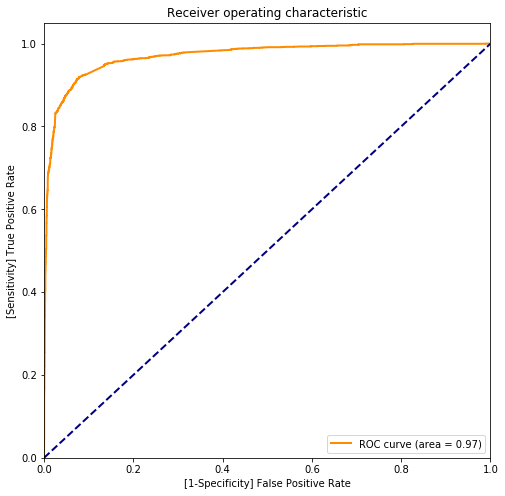

1291


In [129]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted_Prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('[1-Specificity] False Positive Rate')
plt.ylabel('[Sensitivity] True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(len(thresholds))

In [130]:
#We have got a very good ROC curve with area 0.97 with 1291 thresholds taken

### Finding Optimal Cutoff Point

#### Optimal cutoff probability will be probability where balanced sensitivity and specificity is get

In [131]:
#For different values of cutoff, we will find the sensitivity, specificity, and accuracy graph
cut_offs = [float(x)/10 for x in range(10)]
pred = pd.DataFrame()
pred_curve_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec'])
for i in cut_offs:
    pred[i] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > i else 0)
    con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, pred[i])
    accuracy = (con_mat[0,0]+con_mat[1,1])/(sum(sum(con_mat)))
    
    spec = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
    sens = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
    
    pred_curve_df.loc[i] =[ i ,accuracy,sens,spec]
    
pred_curve_df.iloc[:,:]

,prob,accuracy,sens,spec
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.820501,0.971791,0.725736
0.2,0.2,0.887892,0.954620,0.846095
0.3,0.3,0.917651,0.922731,0.914469
0.4,0.4,0.921272,0.903516,0.932394
0.5,0.5,0.921745,0.877351,0.949552
0.6,0.6,0.919855,0.851594,0.962612
0.7,0.7,0.907889,0.798855,0.976184
0.8,0.8,0.894032,0.753884,0.981818
0.9,0.9,0.866950,0.667621,0.991805


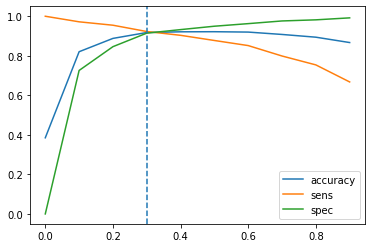

In [132]:
plt.plot(pred_curve_df['prob'],pred_curve_df['accuracy'],label='accuracy')
plt.plot(pred_curve_df['prob'],pred_curve_df['sens'],label='sens')
plt.plot(pred_curve_df['prob'],pred_curve_df['spec'],label='spec')
plt.axvline(x=0.3,linestyle='--')
plt.legend(loc="lower right")
plt.show()

In [133]:
#Optimal cutoff seems to be near ~0.3

In [134]:
#Let's find the final set of metrics for cut_off 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Predicted_Prob,LeadID,predicted,final_predicted
0,0,0.191267,3009,0,0
1,0,0.152584,1012,0,0
2,0,0.002184,9226,0,0
3,1,0.924694,4750,1,1
4,1,0.998884,7987,1,1


In [135]:
confusion_ = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion_[1,1] # true positive 
TN = confusion_[0,0] # true negatives
FP = confusion_[0,1] # false positives
FN = confusion_[1,0] # false negatives
print('Accuracy',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),'\nSensitivity[True-Positive]', TP/float(TP+FN), '\nTrue-Negative(Specificity)', TN/float(TN+FP),'\nFalsePositive rate',
      FP/ float(TN+FP),'\npositive predictive value',TP/ float(TP+FP),'\nNegative predictive value',FN/ float(TN+FN))

Accuracy 0.9176507636592662 
Sensitivity[True-Positive] 0.9227309893704007 
True-Negative(Specificity) 0.9144686299615877 
FalsePositive rate 0.0855313700384123 
positive predictive value 0.8710922423774604 
Negative predictive value 0.050265957446808514


### Precision and Recall

Using sklearn utilities for the same

In [136]:
from sklearn.metrics import precision_score, recall_score
print('Precision',precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),
      '\nRecall',recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision 0.8710922423774604 
Recall 0.9227309893704007


## As CEO required the precision to be at least 80% from our model, this model seems to be performing well

#### Precision recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

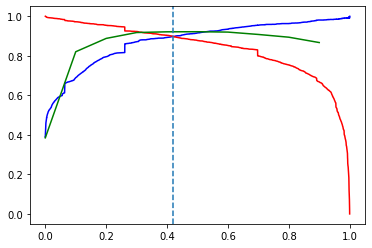

4524


In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted_Prob)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.plot(pred_curve_df['prob'],pred_curve_df['accuracy'],"g-")
plt.axvline(x=0.42,linestyle='--')
plt.show()
print(len(thresholds))

### here it seems that recall and precision tradeoff is good at 0.42 but we will take 0.3 as accuracy is not varying much and precision,recall are above 80% there also

In [140]:
#Assigning the lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Predicted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadID,predicted,final_predicted,Lead_Score
0,0,0.191267,3009,0,0,19
1,0,0.152584,1012,0,0,15
2,0,0.002184,9226,0,0,0
3,1,0.924694,4750,1,1,92
4,1,0.998884,7987,1,1,100


### Predictions using model

In [141]:
#We have already scaled the data of test set
df_test[num] = scaler.fit_transform(df_test[num])
df_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_ways,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specialization_other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellenous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Miscellenous,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,0.666261,1.894051,1.564920,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4216,0,-1.142542,-0.878732,-1.265027,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [142]:
#Predicting using res3
df_test=df_test[final_cols]
X_test_sm = sm.add_constant(df_test)
y_test_pred = res3.predict(X_test_sm)
y_test_pred[:10]

3271    0.125960
1490    0.995685
7936    0.107928
4216    0.998008
3830    0.127593
1800    0.917797
6507    0.004376
4821    0.001078
4223    0.992833
4714    0.308705
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_test_pred1 = pd.DataFrame(y_test_pred)
y_test_pred1.head()

,0
3271,0.125960
1490,0.995685
7936,0.107928
4216,0.998008
3830,0.127593


In [144]:
y_test_pred1['LeadID'] = y_test_pred1.index
y_test = pd.DataFrame(y_test)

In [145]:
# Removing index for both dataframes to append them side by side 
y_test_pred1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test and y_test_pred1
y_pred_final = pd.concat([y_test, y_test_pred1],axis=1)
y_pred_final = y_pred_final.rename(columns={ 0 : 'Predicted_Prob'})
y_pred_final.head()

,Converted,Predicted_Prob,LeadID
0,0,0.125960,3271
1,1,0.995685,1490
2,0,0.107928,7936
3,1,0.998008,4216
4,0,0.127593,3830


In [147]:
y_pred_final['final_predicted'] = y_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Predicted_Prob,LeadID,final_predicted
0,0,0.125960,3271,0
1,1,0.995685,1490,1
2,0,0.107928,7936,0
3,1,0.998008,4216,1
4,0,0.127593,3830,0


In [148]:
confusion_pred = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_pred

array([[1570,  164],
       [  92,  897]], dtype=int64)

In [149]:
print('Precision',precision_score(y_pred_final.Converted, y_pred_final.final_predicted),
      '\nRecall',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision 0.8454288407163054 
Recall 0.9069767441860465


In [150]:
#Assigning the lead score
y_pred_final['Lead_Score'] = y_pred_final.Predicted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Predicted_Prob,LeadID,final_predicted,Lead_Score
0,0,0.125960,3271,0,13
1,1,0.995685,1490,1,100
2,0,0.107928,7936,0,11
3,1,0.998008,4216,1,100
4,0,0.127593,3830,0,13


## Thus we achieved a very good precision of 84% and also gave Lead_Score to all the test data